In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,App Version Code,App Version Name,Review Text,Review Title,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,NaN,NaN,Very bad wallet balance not use.,NaN,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,NaN,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,Waste no use,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,NaN,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,NaN,5


In [3]:
print(train.shape)
print(train.info(verbose=True, null_counts=True))

(5693, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5693 entries, 0 to 5692
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                5693 non-null   object 
 1   App Version Code  4554 non-null   float64
 2   App Version Name  4554 non-null   float64
 3   Review Text       5692 non-null   object 
 4   Review Title      602 non-null    object 
 5   Star Rating       5693 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 267.0+ KB
None


<AxesSubplot:>

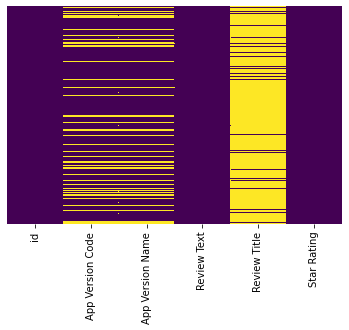

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [5]:
train.drop_duplicates()

,id,App Version Code,App Version Name,Review Text,Review Title,Star Rating
0,b817b0f0-a2f8-4c9d-a5f6-d3fbf8b1d7e9,NaN,NaN,Very bad wallet balance not use.,NaN,1
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,NaN,1
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,Waste no use,2
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,NaN,5
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,NaN,5
...,...,...,...,...,...,...
5688,6a486dfa-10ec-46c3-be48-da4296ff3690,69.0,2.28,Good,NaN,4
5689,9c6745d7-64bd-431a-9861-0737db52eadc,69.0,2.28,Easy to use,NaN,4
5690,2289f5fd-5556-49f8-ab4f-ba5e99a1a50f,68.0,2.27,I'm already a Lazypay account holder using sam...,NaN,2
5691,c11b87db-6e1d-4b52-ae1e-d759809ef2f0,75.0,2.34,"It's so easy to use, I'm just using and fallin...",NaN,5


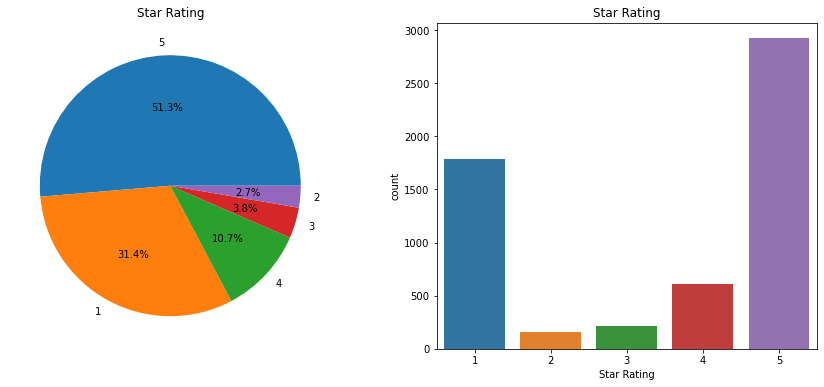

In [6]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    train[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=train, ax=ax[1])
    ax[1].set_title(col)
    plt.show()

piecount('Star Rating')

In [7]:
train.drop('Review Title',axis=1,inplace=True)



In [8]:
train = train.dropna()

<AxesSubplot:>

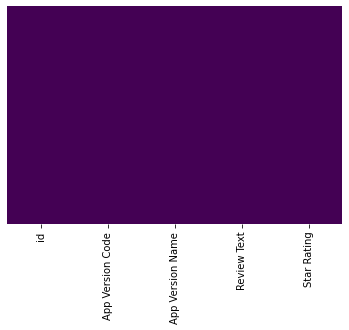

In [9]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
print(train.shape)
print(train.info(verbose=True, null_counts=True))

(4554, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554 entries, 1 to 5691
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4554 non-null   object 
 1   App Version Code  4554 non-null   float64
 2   App Version Name  4554 non-null   float64
 3   Review Text       4554 non-null   object 
 4   Star Rating       4554 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 213.5+ KB
None


In [11]:
train['app_code']= train["App Version Code"].astype(str)+ train["App Version Name"].astype(str)
train.head()

,id,App Version Code,App Version Name,Review Text,Star Rating,app_code
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,1,43.02.3
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,2,52.02.12
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,5,62.02.21
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,5,69.02.28
5,2d55588b-085c-4f55-872b-460520855c93,71.0,2.30,Ghatiya app. Bill fetch nhi hota ..,1,71.02.3


In [12]:
train['app_code'] = train['app_code'].str.replace(r'[^\w\s]+', '')
train.head()

,id,App Version Code,App Version Name,Review Text,Star Rating,app_code
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,43.0,2.30,Froud app i recharge 199 but not done also sen...,1,43023
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,52.0,2.12,Waste to write comments also,2,520212
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,62.0,2.21,Nice apo,5,620221
4,11f8f968-4cec-4424-8427-9709ab05b5be,69.0,2.28,Good nice app,5,690228
5,2d55588b-085c-4f55-872b-460520855c93,71.0,2.30,Ghatiya app. Bill fetch nhi hota ..,1,71023


In [13]:
print(train['app_code'].nunique())

63


In [14]:
pd.options.display.max_rows
df1 = train.groupby('app_code')['id'].nunique()
df1

app_code
10014       6
1010        4
11015      21
13017       2
14017       1
         ... 
870246     80
880247    247
890248     78
900249    187
9013        6
Name: id, Length: 63, dtype: int64

In [15]:
train.drop(columns =['App Version Code', 'App Version Name'] ,axis = 1,inplace = True) 
train.head()

,id,Review Text,Star Rating,app_code
1,c7844e8f-56c1-487b-ae3e-df2fdf4c1767,Froud app i recharge 199 but not done also sen...,1,43023
2,93ff57f7-9e02-4fa9-b779-3db82b8af0a4,Waste to write comments also,2,520212
3,df2dcdef-c09a-4f35-afab-e1231d3fec9a,Nice apo,5,620221
4,11f8f968-4cec-4424-8427-9709ab05b5be,Good nice app,5,690228
5,2d55588b-085c-4f55-872b-460520855c93,Ghatiya app. Bill fetch nhi hota ..,1,71023


In [16]:
train.drop('id',axis=1,inplace=True)
train.head()

,Review Text,Star Rating,app_code
1,Froud app i recharge 199 but not done also sen...,1,43023
2,Waste to write comments also,2,520212
3,Nice apo,5,620221
4,Good nice app,5,690228
5,Ghatiya app. Bill fetch nhi hota ..,1,71023


In [17]:
train['Review Text']

1       Froud app i recharge 199 but not done also sen...
2                            Waste to write comments also
3                                                Nice apo
4                                           Good nice app
5                     Ghatiya app. Bill fetch nhi hota ..
                              ...                        
5687                                             Loved it
5688                                                 Good
5689                                          Easy to use
5690    I'm already a Lazypay account holder using sam...
5691    It's so easy to use, I'm just using and fallin...
Name: Review Text, Length: 4554, dtype: object

In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import nltk
import re

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)
corpus=train['Review Text']
norm_corpus = normalize_corpus(corpus)
norm_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


array(['froud app recharge done also send mail niki even replied',
       'waste write comments also', 'nice apo', ..., 'easy use',
       'im already lazypay account holder using ticket booking online food order bus ticket showing whats use',
       'easy use im using falling love app many payment options choose offers cheery top'],
      dtype='<U699')

In [19]:
train['Review Text']=norm_corpus
train.head()

,Review Text,Star Rating,app_code
1,froud app recharge done also send mail niki ev...,1,43023
2,waste write comments also,2,520212
3,nice apo,5,620221
4,good nice app,5,690228
5,ghatiya app bill fetch nhi hota,1,71023


In [20]:
train.shape

(4554, 3)

In [21]:
app_codefinal = pd.get_dummies(train['app_code'],drop_first=True)
app_codefinal.head()

,1010,11015,13017,14017,17018,18018,2011,28019,29011,30011,...,820241,830242,840243,850244,860245,870246,880247,890248,900249,9013
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
app_codefinal.shape

(4554, 62)

In [23]:
app_codefinal.reset_index(inplace = True)
app_codefinal.head()


,index,1010,11015,13017,14017,17018,18018,2011,28019,29011,...,820241,830242,840243,850244,860245,870246,880247,890248,900249,9013
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
app_codefinal.drop('index',axis=1,inplace=True)
app_codefinal.head()

,1010,11015,13017,14017,17018,18018,2011,28019,29011,30011,...,820241,830242,840243,850244,860245,870246,880247,890248,900249,9013
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

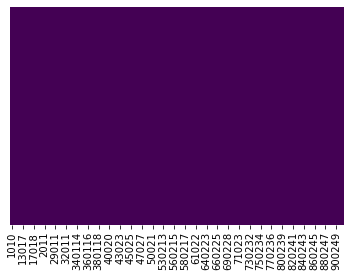

In [25]:
sns.heatmap(app_codefinal.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)


,aa,aacha,aachi,aacount,aadmi,aage,aaj,aajate,aap,aapka,...,youno,youre,youso,youu,youve,ypu,yr,yy,zero,zipping
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(tv_matrix)
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4544,4545,4546,4547,4548,4549,4550,4551,4552,4553
0,1.000000,0.096585,0.000000,0.048774,0.014044,0.057213,0.091316,0.024385,0.000000,0.037643,...,0.067134,0.067134,0.033292,0.113944,0.000000,0.0,0.000000,0.000000,0.000000,0.009890
1,0.096585,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.228492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.048774,0.000000,0.228492,1.000000,0.050635,0.000000,0.249124,0.087915,0.593275,0.135716,...,0.726514,0.726514,0.120030,0.000000,0.191031,0.0,0.593275,0.000000,0.000000,0.035658
4,0.014044,0.000000,0.000000,0.050635,1.000000,0.000000,0.104511,0.025315,0.000000,0.039080,...,0.069696,0.069696,0.034563,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.010268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4549,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
4550,0.000000,0.000000,0.000000,0.593275,0.000000,0.000000,0.280016,0.000000,1.000000,0.000000,...,0.816605,0.816605,0.000000,0.000000,0.321994,0.0,1.000000,0.000000,0.000000,0.000000
4551,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.089496,0.258830
4552,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.089496,1.000000,0.130077


In [28]:
train_final = pd.concat([similarity_df,app_codefinal],axis=1)
train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,820241,830242,840243,850244,860245,870246,880247,890248,900249,9013
0,1.000000,0.096585,0.000000,0.048774,0.014044,0.057213,0.091316,0.024385,0.000000,0.037643,...,0,0,0,0,0,0,0,0,0,0
1,0.096585,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,1.000000,0.228492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.048774,0.000000,0.228492,1.000000,0.050635,0.000000,0.249124,0.087915,0.593275,0.135716,...,0,0,0,0,0,0,0,0,0,0
4,0.014044,0.000000,0.000000,0.050635,1.000000,0.000000,0.104511,0.025315,0.000000,0.039080,...,0,0,0,0,0,0,0,0,0,0


In [29]:
train_final.shape

(4554, 4616)

In [30]:
train_final.index = np.arange(1, len(train_final) + 1)
train_final.head()

,0,1,2,3,4,5,6,7,8,9,...,820241,830242,840243,850244,860245,870246,880247,890248,900249,9013
1,1.000000,0.096585,0.000000,0.048774,0.014044,0.057213,0.091316,0.024385,0.000000,0.037643,...,0,0,0,0,0,0,0,0,0,0
2,0.096585,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.000000,1.000000,0.228492,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.048774,0.000000,0.228492,1.000000,0.050635,0.000000,0.249124,0.087915,0.593275,0.135716,...,0,0,0,0,0,0,0,0,0,0
5,0.014044,0.000000,0.000000,0.050635,1.000000,0.000000,0.104511,0.025315,0.000000,0.039080,...,0,0,0,0,0,0,0,0,0,0


In [31]:
target=train['Star Rating']
target.shape

(4554,)

In [32]:
train_final.shape

(4554, 4616)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import pickle
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [37]:
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 5, num = 2)]

param_grid = {'n_neighbors': n_neighbors}

# Create a base model
knnc = KNeighborsClassifier()

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 3)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knnc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(train_final, target)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.2min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=3, test_size=0.33, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5]}, scoring='accuracy', verbose=1)

In [38]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'n_neighbors': 5}

The mean accuracy of a model with these hyperparameters is:
0.6620093147039255


In [42]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 3, num = 5)]

# max_features
max_features = ['auto']

# max_depth
max_depth = [int(x) for x in np.linspace(1, 3, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 1, 2, 2, 3, None],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [1, 1, 2, 2, 3]}


In [43]:
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(train_final,target)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=8),
                   n_iter=50,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 1, 2, 2, 3, None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [1, 1, 2, 2, 3]},
                   random_state=8, scoring='accuracy', verbose=1)

In [44]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)


The best hyperparameters from Random Search are:
{'n_estimators': 3, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.688844971453667
